PRINCIPIO DE DISEÑO DE FEATURES


*   _Features Informativas_: Tus features son más utiles mientras más correlación tengan tu variable objetivo.
*   _Features Independientes_: Para no tener redudancias tus features deberían ser lo más independientes posible entre ellas.
*   _Cantidad de Features controlada_: Nuestra intuición nos falla en dimensiones superiores a 3 (ver video maldicion de la dimensionalidad). En la mayoría de los casos aumentar la cantidad de features afecta negativamente la performance si no contamos con una gran cantidad de datos. Por ultimo pocas features aseguran una mejor interpretabilidad de los modelos

In [7]:
import numpy as np
import pandas as pd

In [8]:
X = pd.read_csv('../data/processed/X.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', 'domestic_gross', axis=1)

In [9]:
# Volvemos a entrenar nuestro modelo
from sklearn.linear_model import Lasso
model = Lasso()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [11]:
#Se revisa el default
len(X_train)/len(X)

0.75

In [12]:
model.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.297e+18, tolerance: 8.874e+15
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [13]:
model.score(X_test, y_test)

0.8398354222347885

In [14]:
X.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [16]:
# Parámetros de la regresión lineal
model.coef_

array([ 1.06930980e+00,  7.92104878e+05, -4.60363895e+06,  2.84212791e+04,
       -2.18693090e+02,  2.36131061e-04,  7.99109382e+06,  1.97791140e+00])

In [17]:
np.log10(np.abs(model.coef_))

array([ 0.02910355,  5.89878269,  6.66310126,  4.45364362,  2.33983506,
       -3.62684688,  6.90260623,  0.29620683])

In [22]:
var = np.floor(np.log10(np.abs(model.coef_)))

In [20]:
import matplotlib.pyplot as plt

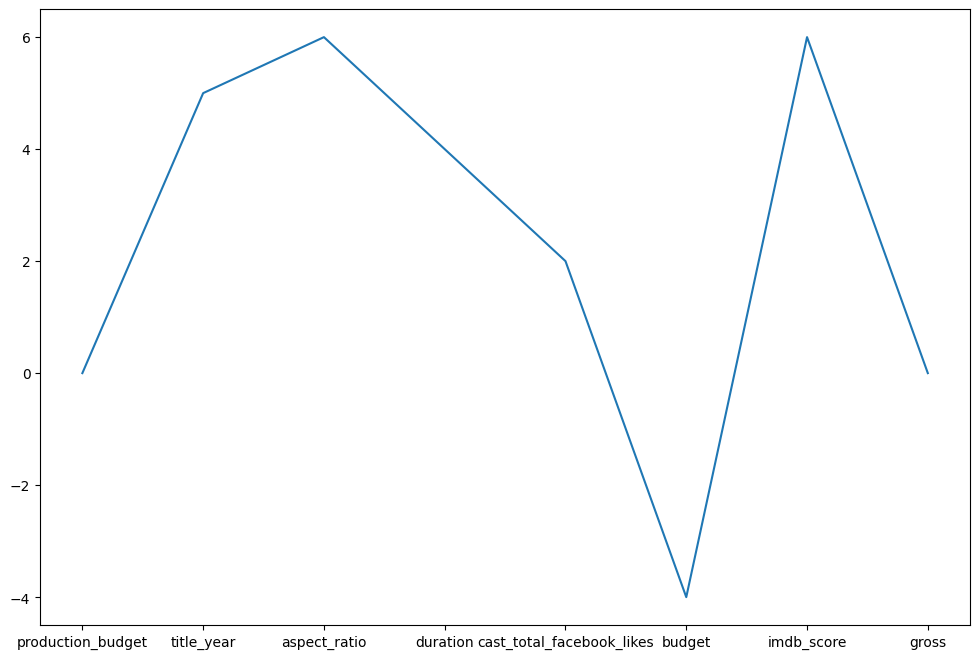

In [26]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(8),list(X.columns));

A partir de la gráfica anterior, se pueden identificar qué _features_ son más importantes, por ejemplo el *aspect ratio* y el *imdb_score* tienen un gran impacto en la efectividad del modelo. De manera que, si deseamos reducir la dimensionalidad de los datos, así, este análisis nos ayuda a identificar aquellas columnas que tienen un menor aporte. 

También podemos utilizar técnicas de visualización, ayudando en dos aspectos: 
*  La correlación entre las variables mismas.
* Correlación entre cada _feature_ con la variable objetivo. 

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


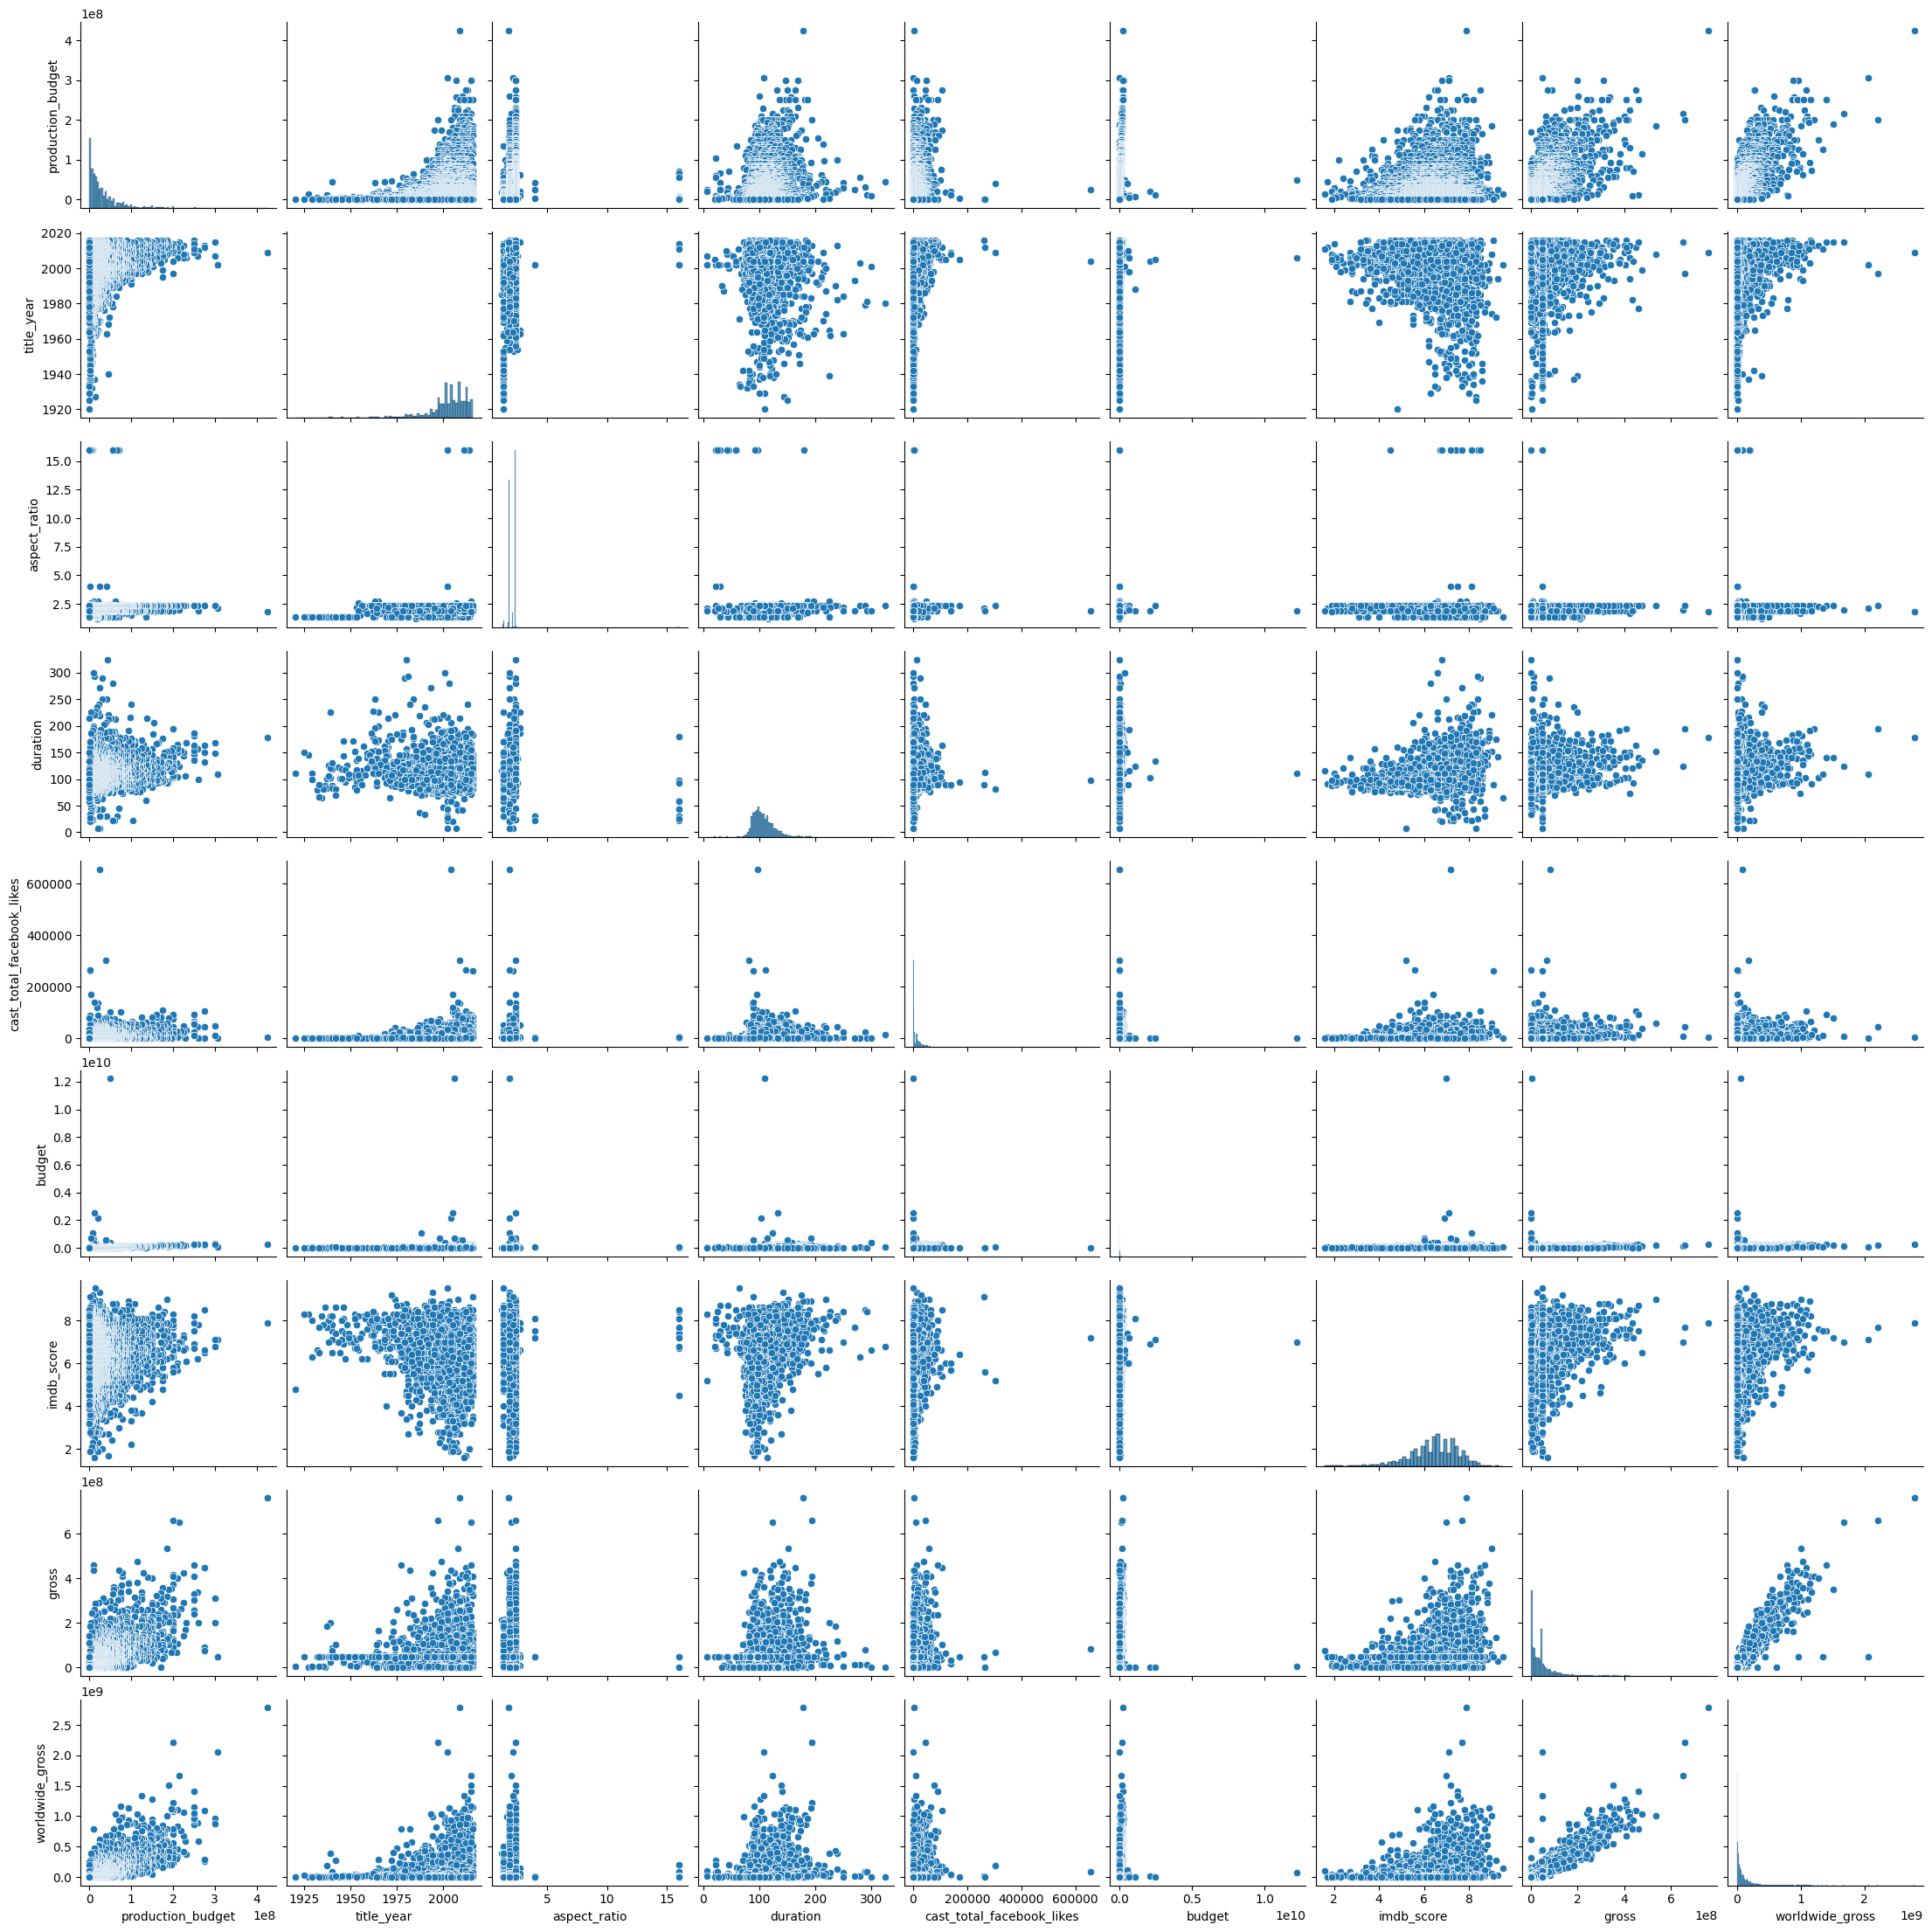

In [27]:
import seaborn as sns
z = pd.concat([X,y], axis=1)
sns.pairplot(z)

In [30]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')

In [34]:
z2 = pd.concat([X, clase], axis=1)

In [37]:
z2

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,class
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,7
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07,5
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,5
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,5
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,5
...,...,...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,4.247600e+05,0
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.007100e+04,0
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,4.831933e+07,0
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04,0


La clase lo que me dice es qué tan costosa fue la película, entre más alto es el número, mayor fue el costo. 

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


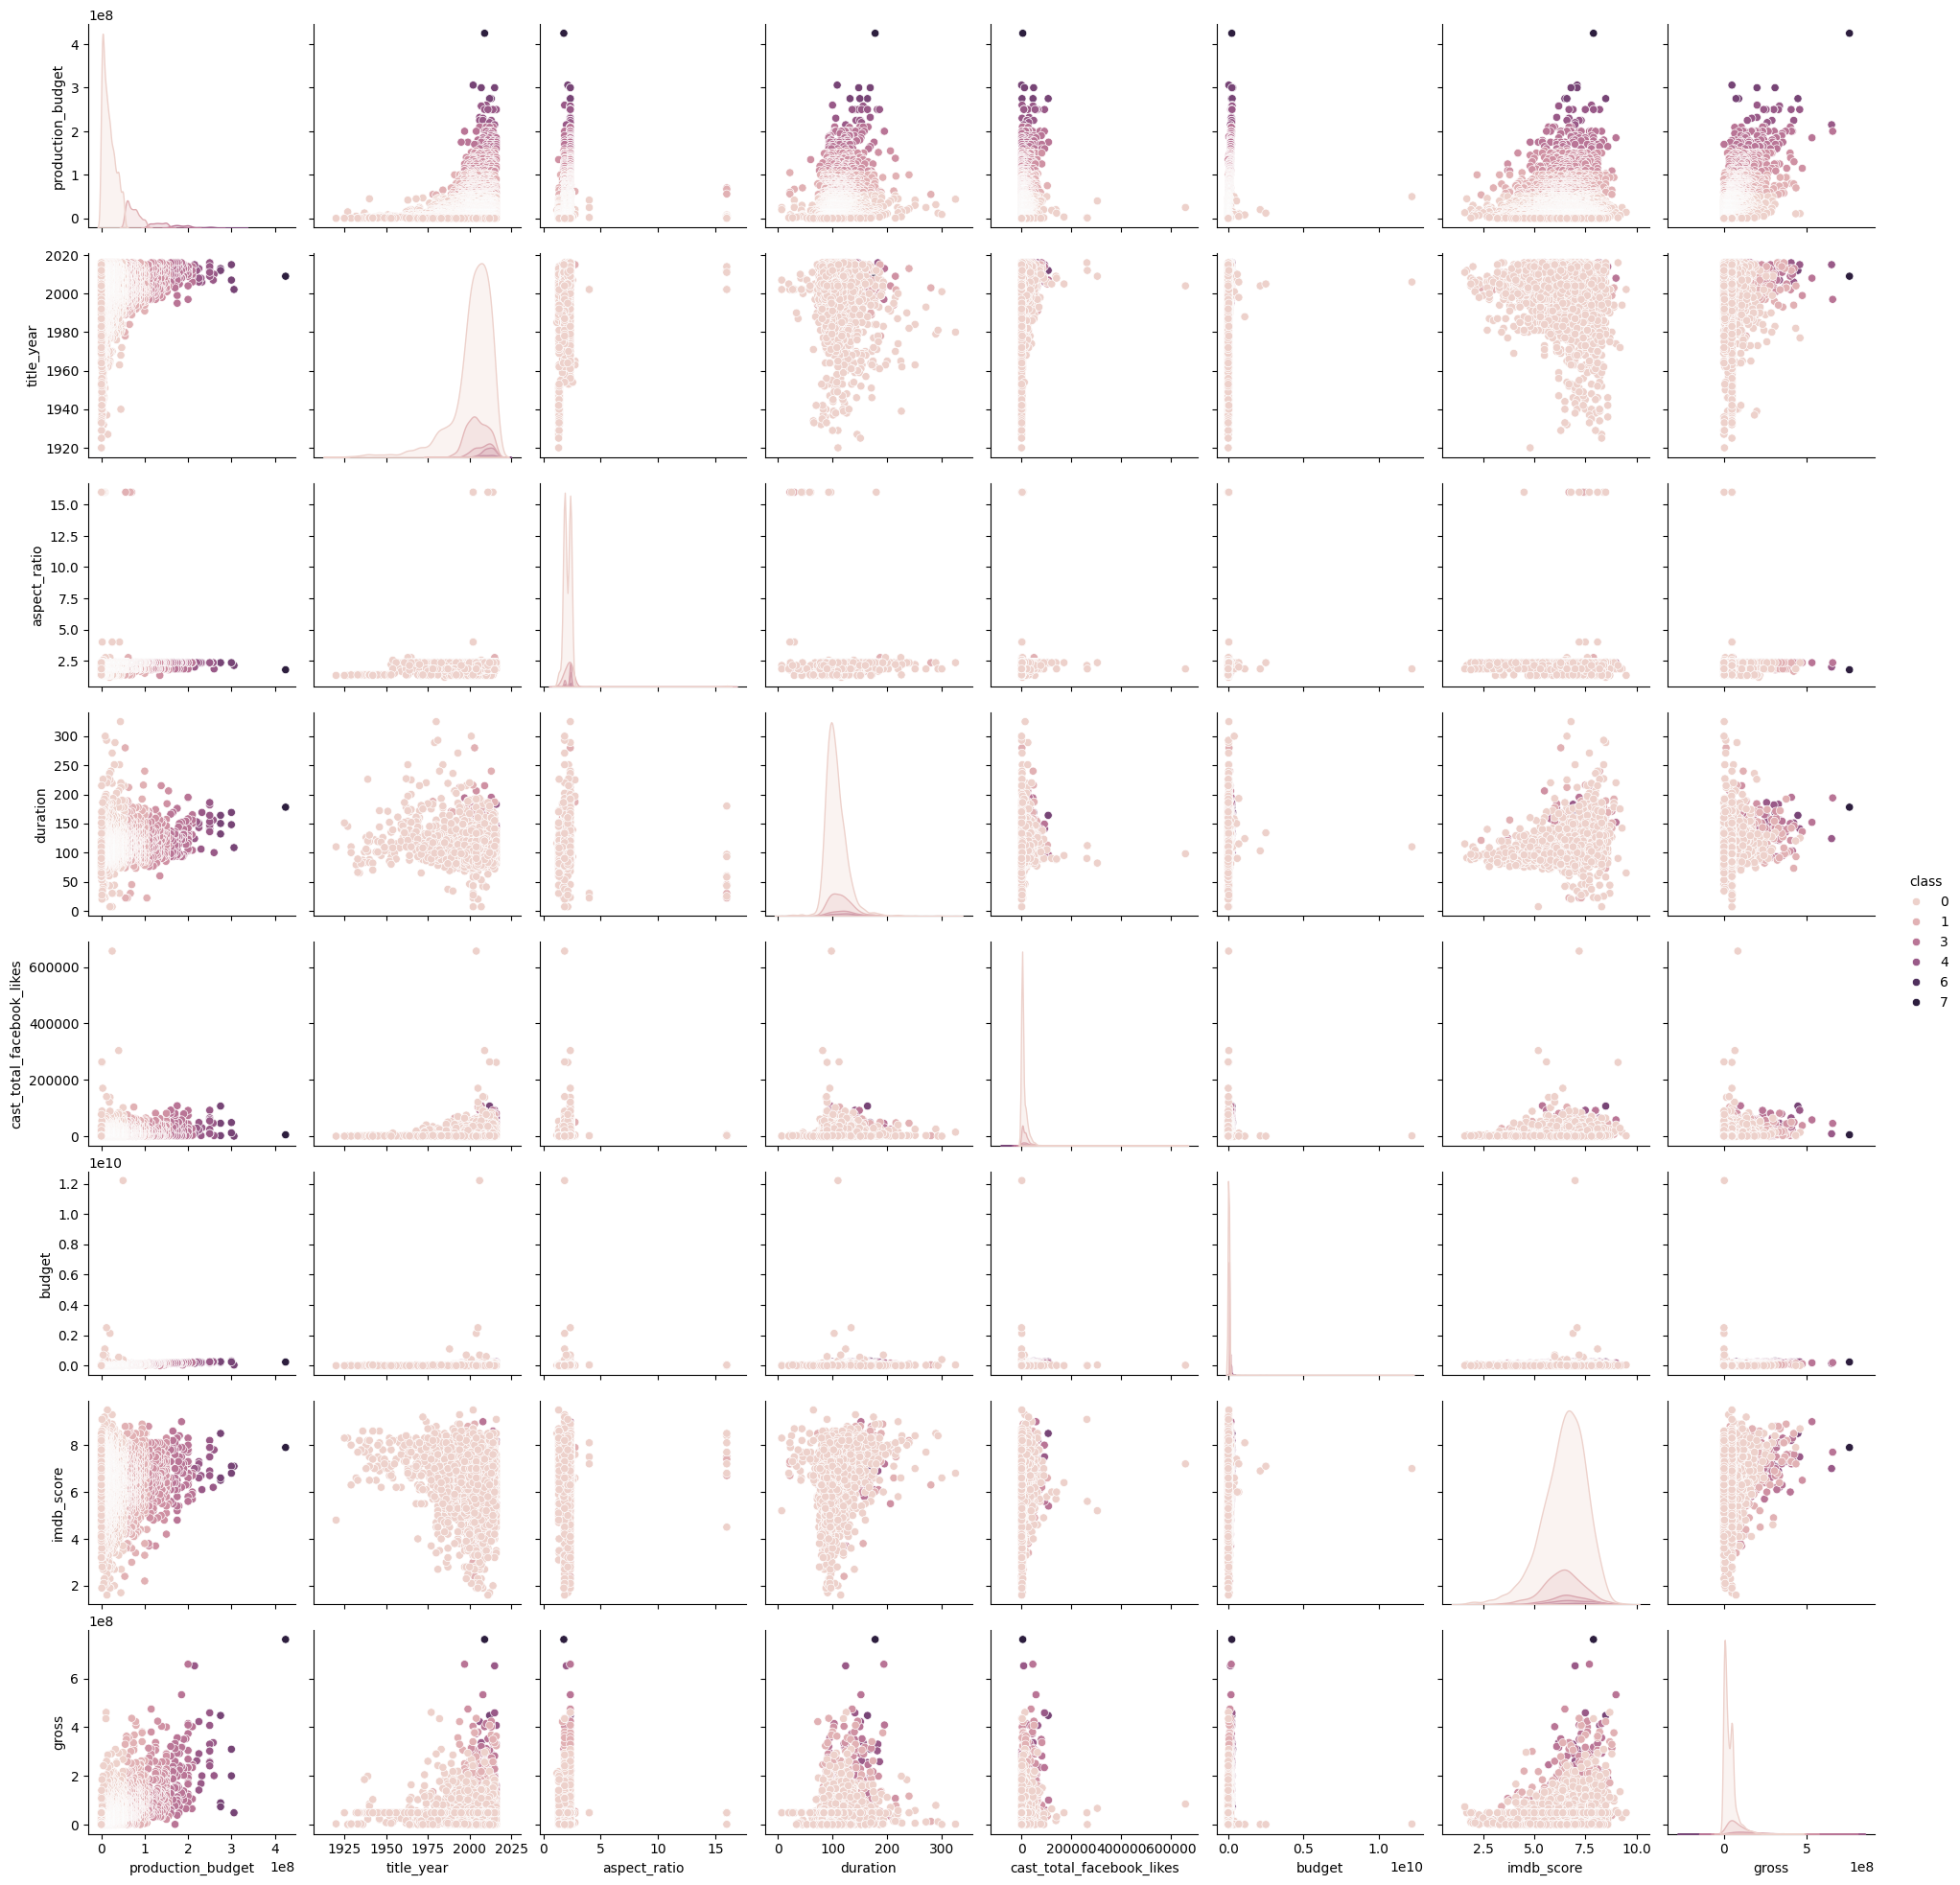

In [38]:
sns.pairplot(z2, hue='class')

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


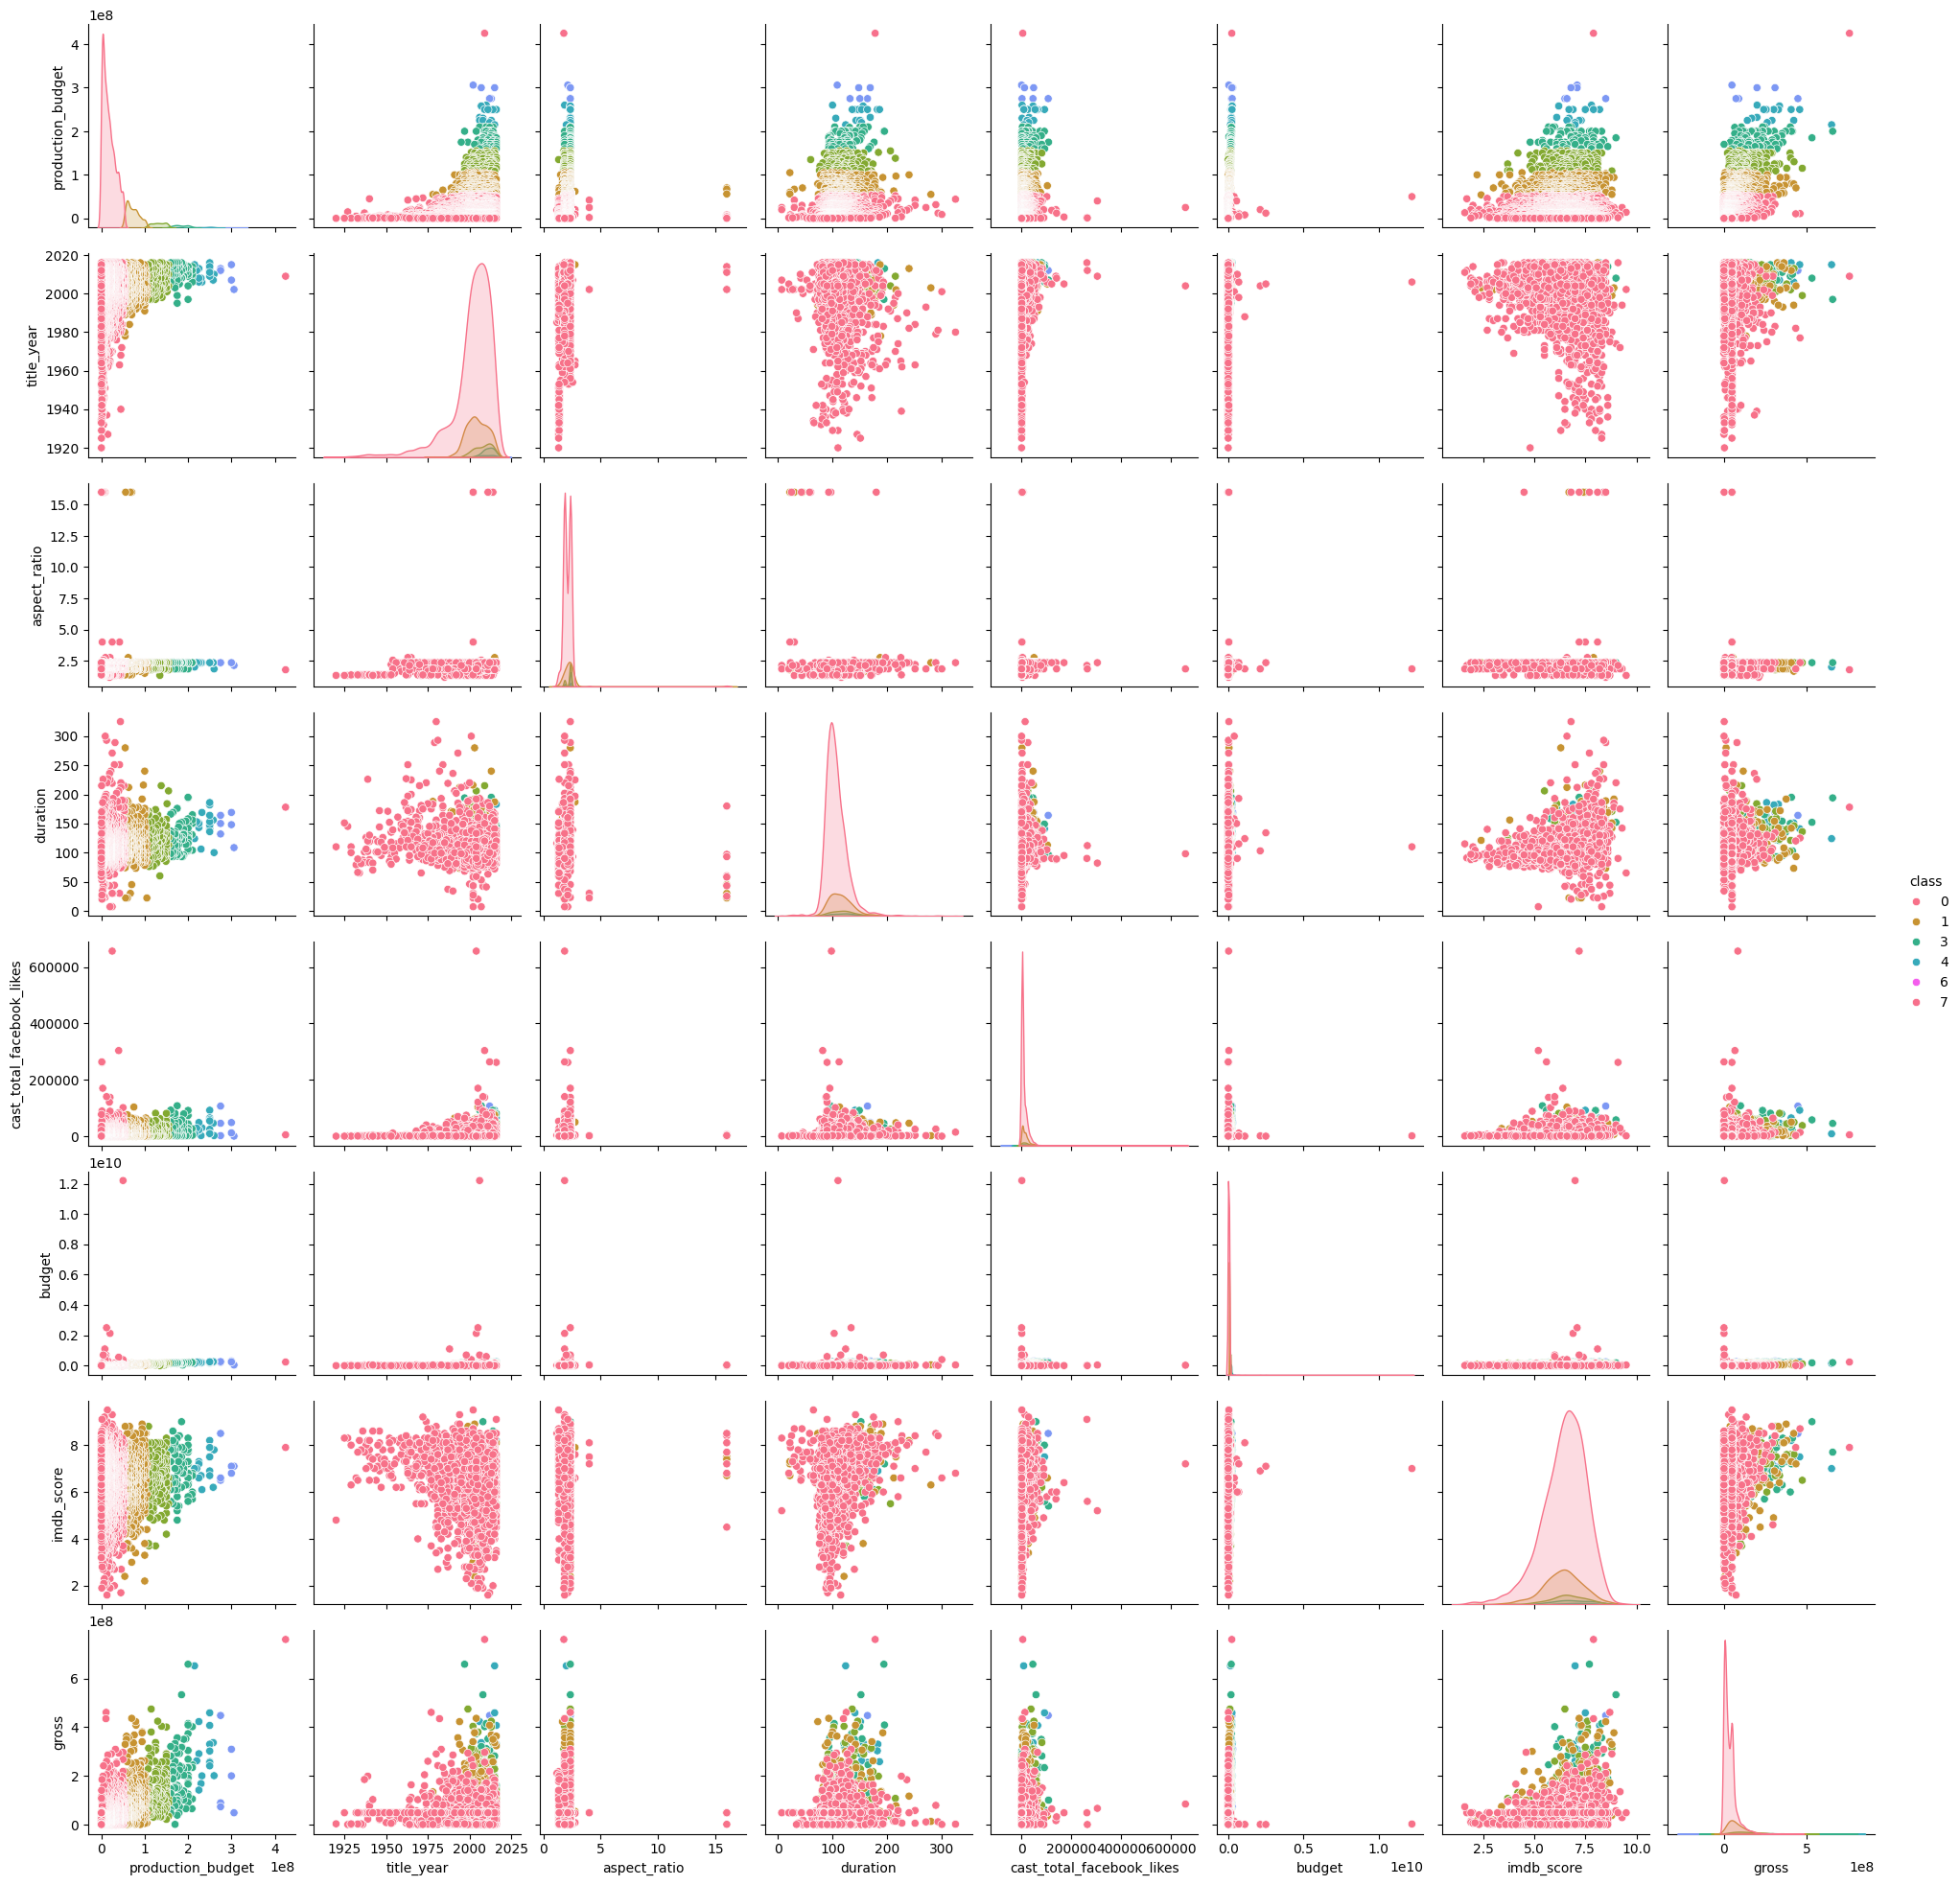

In [39]:
sns.pairplot(z2, hue='class', palette='husl')

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [41]:
selector = SelectKBest(mutual_info_regression, k=4) # Se están seleccionando las 4 mejores características
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001EBA955AFC0>)

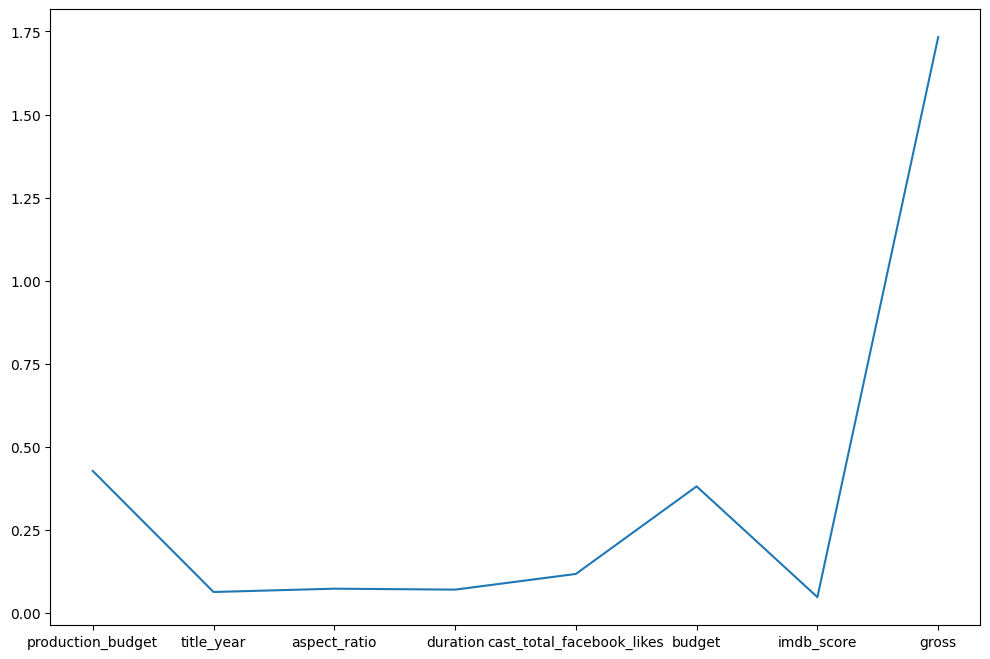

In [45]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(8), list(X.columns));

Después de realizar el análisis, podemos tener una visión clara de que características podemos quitar para mejorar nuestro score. 

In [62]:
X2 = X[['production_budget', 'budget', 'gross', 'cast_total_facebook_likes']]
X3 = X[['title_year', 'aspect_ratio', 'imdb_score', 'duration', 'cast_total_facebook_likes']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [64]:
cols2 = ['production_budget', 'budget', 'gross', 'cast_total_facebook_likes']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['title_year', 'aspect_ratio', 'imdb_score', 'duration', 'cast_total_facebook_likes']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [65]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.721e+17, tolerance: 9.521e+15
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [66]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.871241066392896
0.8665072401865344
0.13207705935216796
